[Documentation](https://spark.apache.org/docs/2.3.0/api/python/pyspark.sql.html#pyspark.sql.SparkSession)

In [1]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import regexp_extract
# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
df = spark.read.csv('/home/jovyan/work/Spark/spark-warehouse/Vermont_Vendor_Payments.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))

In [3]:
# Rename a column
df=df.withColumnRenamed("Quarter Ending","Quarter_Ending")
df.columns

['Quarter_Ending',
 'Department',
 'UnitNo',
 'Vendor Number',
 'Vendor',
 'City',
 'State',
 'DeptID Description',
 'DeptID',
 'Amount',
 'Account',
 'AcctNo',
 'Fund Description',
 'Fund']

In [4]:
df.printSchema()

root
 |-- Quarter_Ending: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- UnitNo: integer (nullable = true)
 |-- Vendor Number: string (nullable = true)
 |-- Vendor: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- DeptID Description: string (nullable = true)
 |-- DeptID: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- Account: string (nullable = true)
 |-- AcctNo: string (nullable = true)
 |-- Fund Description: string (nullable = true)
 |-- Fund: string (nullable = true)



##### Se crea una tabla temporal <span style="color:green;">VermontVendor</span> a la que luego se le pueden hacer consultas
- *createOrReplaceTempView('VermontVendor')* : Crea la tabla temporal
- *dropTempTable('VermontVendor')* : Elimina la tabla temporal
- *registerDataFrameAsTable(df, 'VermontVendor')* : Registra una tabla temporal desde un DataFrame

In [5]:
#Se crea una tabla temporal 
df.createOrReplaceTempView('VermontVendor')
#Retorna la tabla especificada como DatFrame
spark.table("VermontVendor").show(2)

+--------------+--------------------+------+-------------+--------------------+----------+-----+--------------------+----------+------+--------------------+------+--------------------+-----+
|Quarter_Ending|          Department|UnitNo|Vendor Number|              Vendor|      City|State|  DeptID Description|    DeptID|Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+----------+-----+--------------------+----------+------+--------------------+------+--------------------+-----+
|    03/31/2019|              Health|  3420|   0000283499|    A T & T Mobility|   Atlanta|   GA|       LH Rutland DO|3420021509| 58.08|Telecom-Wireless ...|516659|Federal Revenue Fund|22005|
|    03/31/2019|Environmental Con...|  6140|   0000042844|University of Ver...|Burlington|   VT|Mon, Assess & Pla...|6140040225|3239.4|        Other Grants|550500|Federal Revenue Fund|22005|
+--------------+--------------------+------+-

In [6]:
df.show(2)

+--------------+--------------------+------+-------------+--------------------+----------+-----+--------------------+----------+------+--------------------+------+--------------------+-----+
|Quarter_Ending|          Department|UnitNo|Vendor Number|              Vendor|      City|State|  DeptID Description|    DeptID|Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+----------+-----+--------------------+----------+------+--------------------+------+--------------------+-----+
|    03/31/2019|              Health|  3420|   0000283499|    A T & T Mobility|   Atlanta|   GA|       LH Rutland DO|3420021509| 58.08|Telecom-Wireless ...|516659|Federal Revenue Fund|22005|
|    03/31/2019|Environmental Con...|  6140|   0000042844|University of Ver...|Burlington|   VT|Mon, Assess & Pla...|6140040225|3239.4|        Other Grants|550500|Federal Revenue Fund|22005|
+--------------+--------------------+------+-

### Consultas
- **sql(sqlQuery)** : Retorna un DataFrame con el resultado de la consulta
- **select(cols)** : Selecciona columnas
- **agg(exprs)** : Agrega una columna al DataFrame con alguna función (como max, mean, min)
- **colRegex(colName)** : Selecciona las columnas filtradas por Regex
- **df.select(regexp_extract(str,pattern,idx))** : Extrae de una columna de texto un patrón de regex
- **collect()** : Retorna todos los elementos como una lista de **Row**
- **filter(condition)** : Filtras las filas dada una condición
- **foreach(f)** : Aplica la función ***f*** a todas las filas
- **replace(to_replace, value, subset=None)** : Reemplaza un valor por otro
 - *to_replace* : valor a ser reemplazado
 - *value* : valor de reemplazo
 - *subset* : lista de columnas para considerar
- **to** : Retorna las siguientes opciones:
 - *toDF(cols)* : retorna una nueva clase
 - *toJSON()* : retorna un json
 - *toPandas()* : retorna un pandas DataFrame
- **cast(dataType)** : Convierte el dataType de la columna
- **crosstab(col1, col2)** : Compara 2 columnas
- **withColumn(colName, col)** : Retorna un nuevo dataframe con la nueva columna añadida (o reemplazada por el mismo nombre)

In [22]:
spark.sql(
'''
SELECT Quarter_Ending, Department, Amount, State FROM VermontVendor
LIMIT 5
'''
).show()

+--------------+--------------------+------+-----+
|Quarter_Ending|          Department|Amount|State|
+--------------+--------------------+------+-----+
|    03/31/2019|              Health| 58.08|   GA|
|    03/31/2019|Environmental Con...|3239.4|   VT|
|    03/31/2019|       Public Safety|469.23|   GA|
|    03/31/2019|Environmental Con...|1533.0|   VT|
|    03/31/2019|              Health| 88.05|   GA|
+--------------+--------------------+------+-----+



In [23]:
df.select('Quarter_Ending', 'Department', \
          'Amount', 'State').show(5)





+--------------+--------------------+------+-----+
|Quarter_Ending|          Department|Amount|State|
+--------------+--------------------+------+-----+
|    03/31/2019|              Health| 58.08|   GA|
|    03/31/2019|Environmental Con...|3239.4|   VT|
|    03/31/2019|       Public Safety|469.23|   GA|
|    03/31/2019|Environmental Con...|1533.0|   VT|
|    03/31/2019|              Health| 88.05|   GA|
+--------------+--------------------+------+-----+
only showing top 5 rows



In [24]:
spark.sql(
'''
SELECT Quarter_Ending, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Education'
LIMIT 10
''').show()

+--------------+----------+--------+-----+
|Quarter_Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    09/30/2013| Education|   258.9|   VT|
|    09/30/2013| Education|28734.96|   VT|
|    09/30/2013| Education| 9515.22|   VT|
|    09/30/2013| Education|     2.3|   MA|
|    09/30/2013| Education|37587.88|   VT|
|    09/30/2013| Education|   540.0|   CA|
|    09/30/2013| Education| 1191.88|   VT|
|    09/30/2013| Education|    75.9|   VT|
|    09/30/2013| Education| 8917.22|   VT|
|    09/30/2013| Education|   33.95|   VT|
+--------------+----------+--------+-----+



In [25]:
df.select('Quarter_Ending', 'Department', \
          'Amount', 'State') \
        .filter(df['Department'] == 'Education') \
        .show(10)


+--------------+----------+--------+-----+
|Quarter_Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    09/30/2013| Education|   258.9|   VT|
|    09/30/2013| Education|28734.96|   VT|
|    09/30/2013| Education| 9515.22|   VT|
|    09/30/2013| Education|     2.3|   MA|
|    09/30/2013| Education|37587.88|   VT|
|    09/30/2013| Education|   540.0|   CA|
|    09/30/2013| Education| 1191.88|   VT|
|    09/30/2013| Education|    75.9|   VT|
|    09/30/2013| Education| 8917.22|   VT|
|    09/30/2013| Education|   33.95|   VT|
+--------------+----------+--------+-----+
only showing top 10 rows



In [104]:
df.groupby('Department') \
.agg({'Amount': 'max'}).show(10)


+--------------------+--------------+
|          Department|   max(Amount)|
+--------------------+--------------+
|               Labor|      750000.0|
|Vermont Health Ac...|2.1215498516E8|
|Natural Resources...|    1388871.33|
|Public Service Board|     136425.85|
|Aging and Indepen...| 3.982599825E7|
|Children and Fami...| 1.860655902E7|
|           Education|    5752647.86|
|Administration Ag...| 3.154938928E7|
|Children and Fami...| 1.539365522E7|
|DLL - Div of Liqu...|     1028128.0|
+--------------------+--------------+
only showing top 10 rows



In [105]:
spark.sql('''
SELECT Department, max(Amount) FROM VermontVendor 
GROUP BY Department
LIMIT 10 ''').show()

+--------------------+--------------+
|          Department|   max(Amount)|
+--------------------+--------------+
|               Labor|      750000.0|
|Vermont Health Ac...|2.1215498516E8|
|Natural Resources...|    1388871.33|
|Public Service Board|     136425.85|
|Aging and Indepen...| 3.982599825E7|
|Children and Fami...| 1.860655902E7|
|           Education|    5752647.86|
|Administration Ag...| 3.154938928E7|
|Children and Fami...| 1.539365522E7|
|DLL - Div of Liqu...|     1028128.0|
+--------------------+--------------+



In [74]:
#Seleccionar columnas que parten con B-->F mayúscula
df.select(df.colRegex("`([B-F])\w+`")).show(3)

+--------------------+----------+----------+-----+
|          Department|      City|    DeptID| Fund|
+--------------------+----------+----------+-----+
|              Health|   Atlanta|3420021509|22005|
|Environmental Con...|Burlington|6140040225|22005|
|       Public Safety|   Atlanta|2140031000|22005|
+--------------------+----------+----------+-----+
only showing top 3 rows



In [38]:
df.crosstab(df.Department,df.City).sort('Department').show(5)

ValueError: col1 should be a string.

In [8]:
spark.sql('''
SELECT DISTINCT count(Department) From VermontVendor
''').show()

+-----------------+
|count(Department)|
+-----------------+
|          1555843|
+-----------------+



In [68]:
#Correlación entre 2 columnas numéricas
df.corr('UnitNo','Amount')

-0.013723433042449879

In [7]:
expr = '^[0-9]{2}'
new_df = df.withColumn('New_date', \
        regexp_extract(df['Quarter_Ending'], \
                       expr,1))

In [28]:
new_df.createOrReplaceTempView('new_VermontVendor')
spark.sql('''
SELECT * FROM new_VermontVendor
''')

DataFrame[Quarter_Ending: string, Department: string, UnitNo: int, Vendor Number: string, Vendor: string, City: string, State: string, DeptID Description: string, DeptID: string, Amount: double, Account: string, AcctNo: string, Fund Description: string, Fund: string, New_date: string]

In [27]:
new_df.select('Department').distinct().show(4)

+--------------------+
|          Department|
+--------------------+
|               Labor|
|Vermont Health Ac...|
|Natural Resources...|
|Public Service Board|
+--------------------+
only showing top 4 rows



### Plotting
Para graficar una consulta, se transforma a un dataframe con la función <span style="color:green;">*.toPandas()*</span>

Aquí se grafica la suma total de *Amount* por *Departamento*

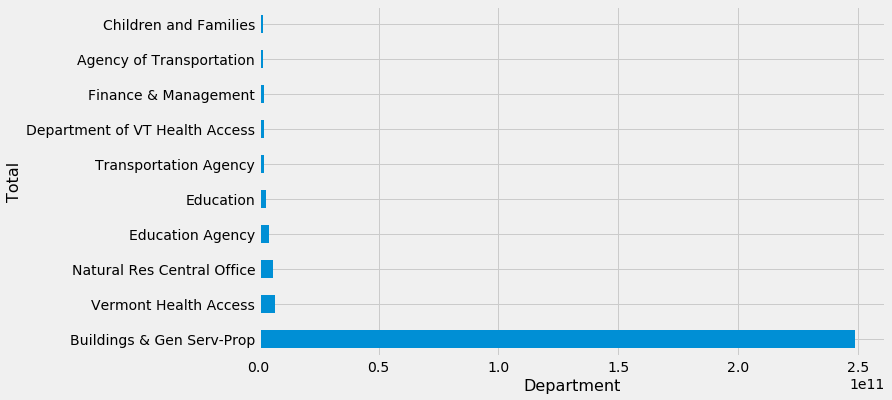

In [32]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
#plt.savefig('barplot.png')
plt.show()

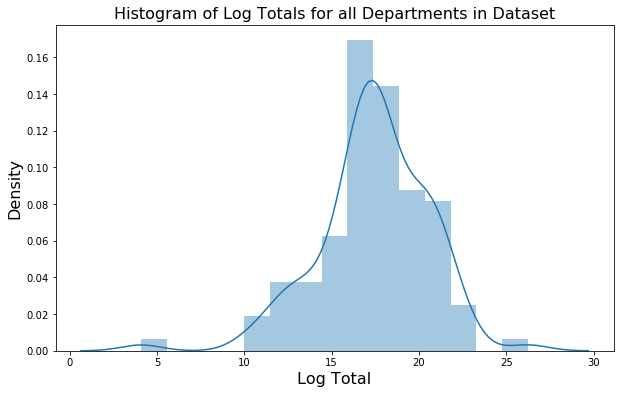

In [62]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
#plt.savefig('distplot.png')
plt.show()

#### Gráfico de las variables utilizadas

In [76]:
import sys
def bytes_var():
    variables = %who_ls    
    peso=[]
    for i in range(len(variables)):
        peso.append(sys.getsizeof(variables[i]))
        #print(variables[i] + ': ' + str(sys.getsizeof(variables[i])) + ' bytes')
    d = {'Variables':variables,'Peso':peso}
    df = pd.DataFrame(d)    
    return df

pv=bytes_var().sort_values(by=['Peso'], ascending=False)        

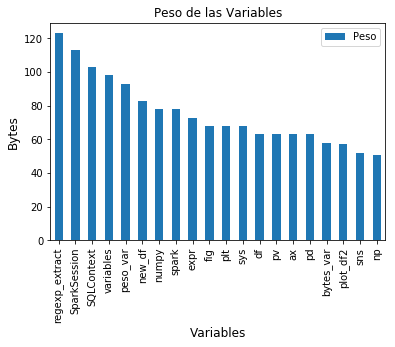

In [77]:
pv.plot(kind='bar',x='Variables',y='Peso')
plt.ylabel('Bytes', size = 12)
plt.xlabel('Variables', size = 12)
plt.title('Peso de las Variables')
plt.show()

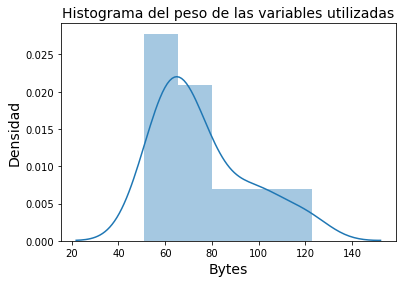

In [80]:
sns.distplot((pv['Peso']))
plt.title('Histograma del peso de las variables utilizadas', size = 14)
plt.ylabel('Densidad', size = 14)
plt.xlabel('Bytes', size = 14)
plt.show()

In [81]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

KeyError: 'axes.color_cycle'

<Figure size 864x576 with 0 Axes>

/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


TypeError: '<=' not supported between instances of 'str' and 'int'

<Figure size 864x576 with 0 Axes>

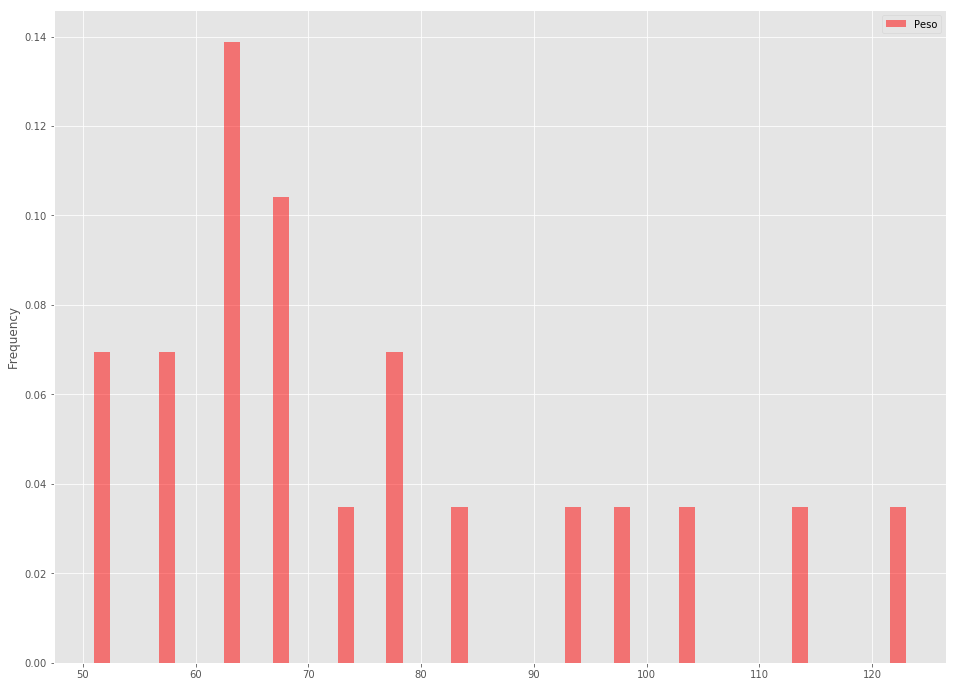

In [84]:
# Plot for comparison
plt.figure(figsize=(12,8))
ax = pv.plot(kind='hist', bins=50, normed=True, alpha=0.5, color='red')
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(pv, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
pv.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')